In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/bank.csv')
data.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [ ]:
data.shape

(515, 6)

In [ ]:
data.describe()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,258.000000,232.252427,150.693204,81.687379,2934.669903,598.603883
std,148.811962,66.648815,56.897777,28.596912,437.062831,83.487891
min,1.000000,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,129.500000,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,258.000000,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,386.500000,291.000000,200.000000,105.000000,3300.000000,657.500000
max,515.000000,350.000000,247.000000,212.000000,3650.000000,838.000000


# **Checking Null values are there or not**

In [ ]:
data.isnull().sum()

,0
Bank,0
DD,0
Withdrawals,0
Deposits,0
Branch Area in sqft,0
avg daily walkins,0


# **Checking The DataType is proper or not**

In [ ]:
data.dtypes

,0
Bank,int64
DD,int64
Withdrawals,int64
Deposits,int64
Branch Area in sqft,int64
avg daily walkins,int64


# **Scaling The Dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Scaled_data = scaler.fit_transform(data)

Scaled_data = pd.DataFrame(Scaled_data, columns=data.columns)

Scaled_data.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-1.728691,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.721964,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,-1.715238,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,-1.708512,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-1.701785,-0.874870,-0.276082,1.621072,1.065711,-0.235039


# **Exploratory Data Analysis**

<Axes: >

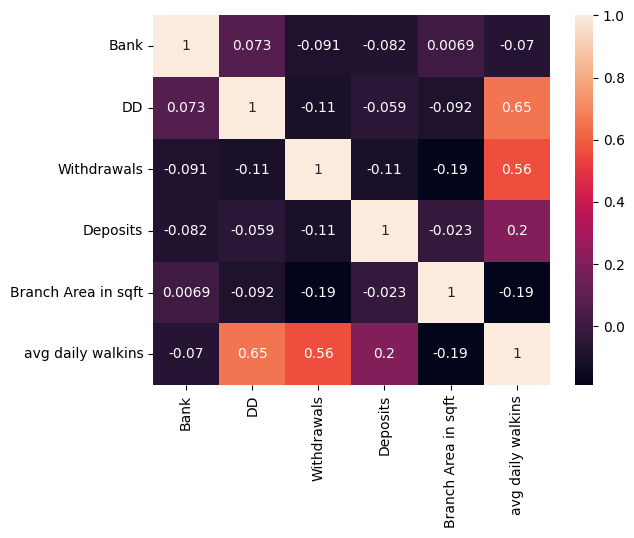

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(Scaled_data.corr(), annot=True)

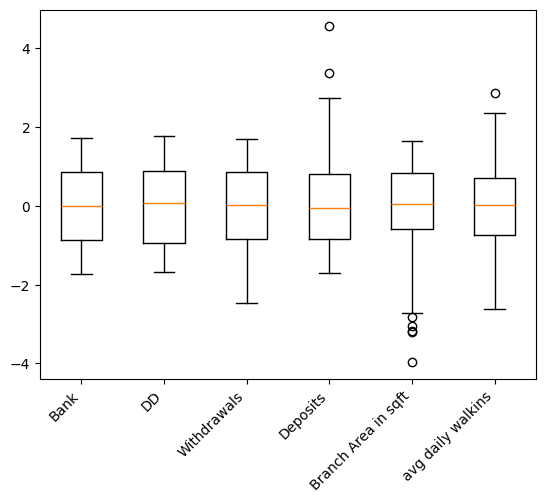

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Scaled_data' is your DataFrame
plt.boxplot(Scaled_data, labels=Scaled_data.columns)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.show()


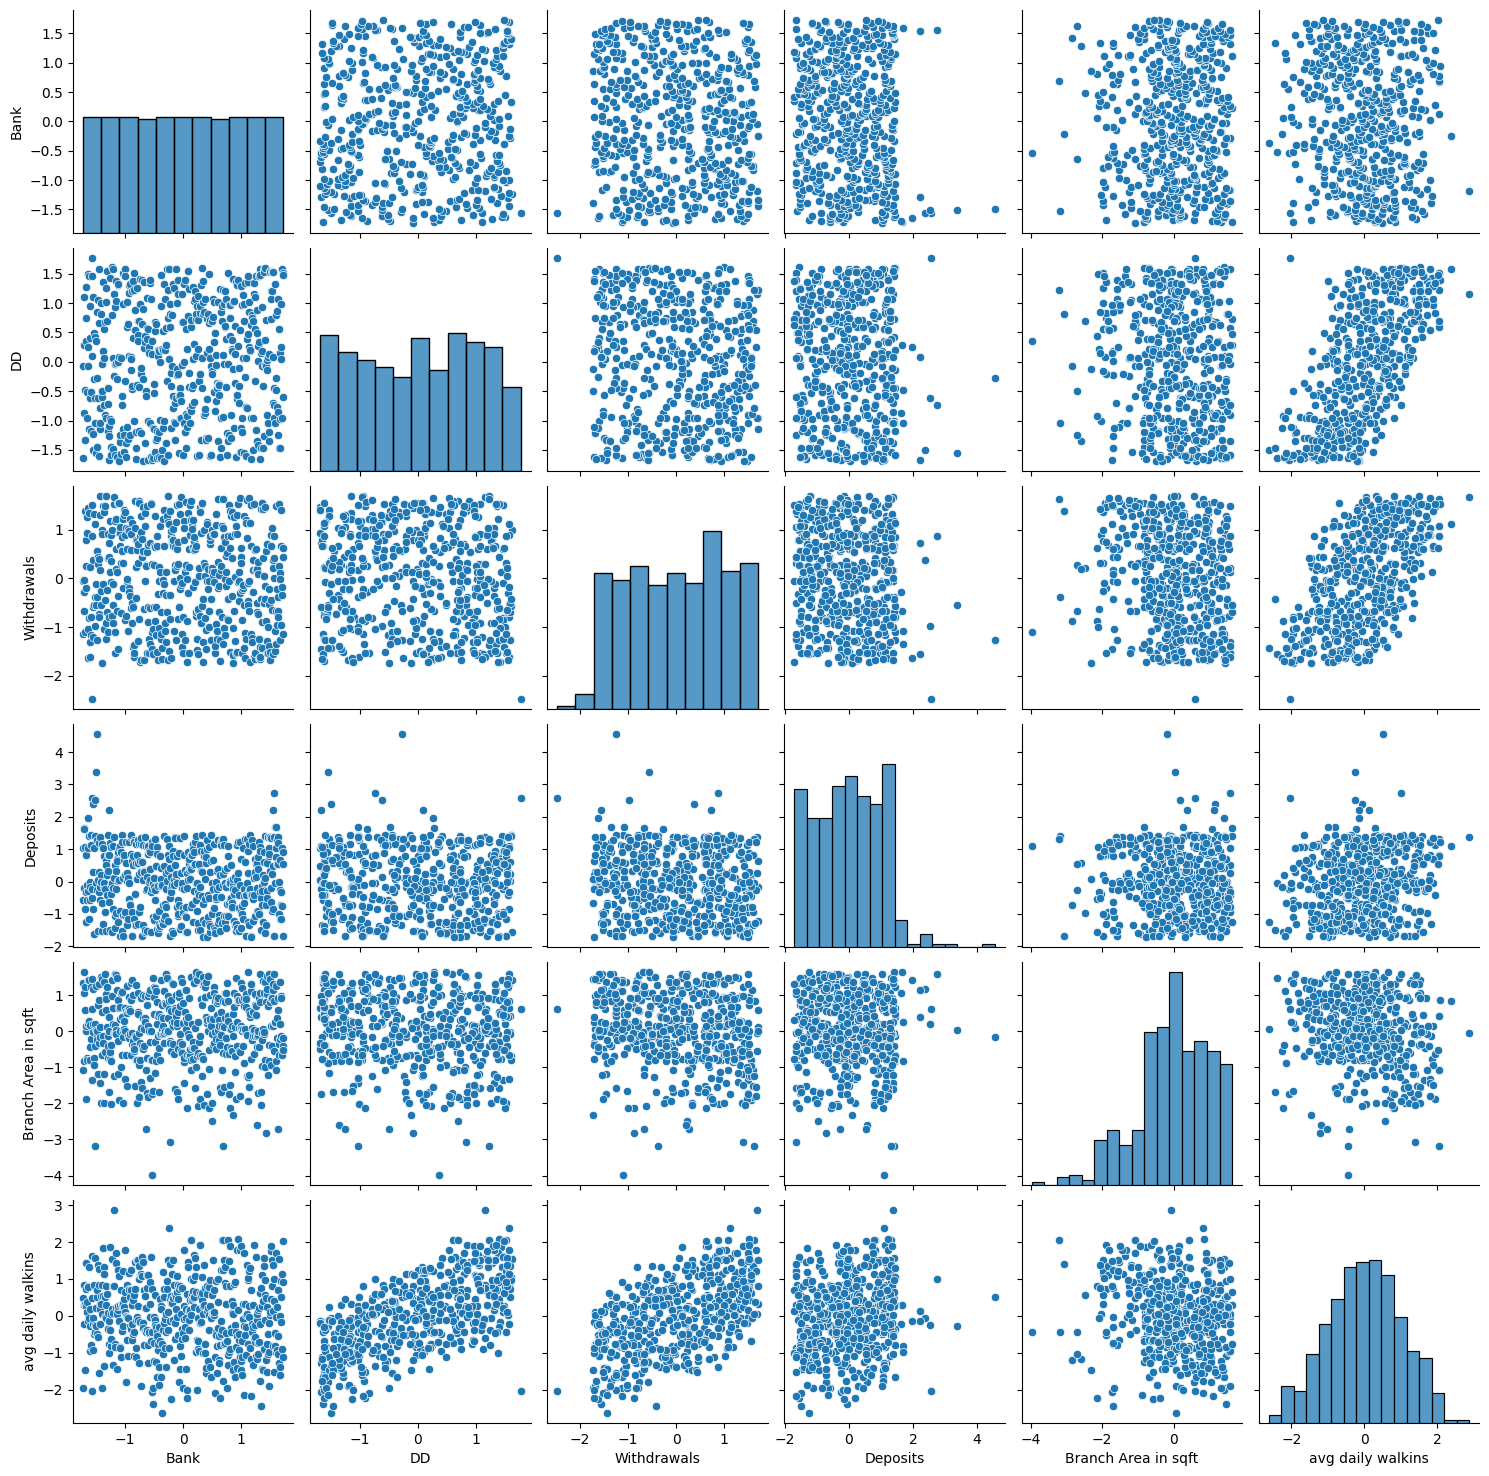

In [ ]:

sns.pairplot(Scaled_data)


# **2. Dimensionality Reduction using numpy**

**Compute the covariance matrix of the dataset M**

In [ ]:
import numpy as np

# Assuming 'Scaled_data' is your DataFrame containing the scaled data
M = Scaled_data.values  # Convert DataFrame to NumPy array

# Calculate the covariance matrix
covariance_matrix = np.cov(M, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[ 1.00194553  0.07309869 -0.0909455  -0.08187075  0.00694934 -0.07034307]
 [ 0.07309869  1.00194553 -0.10747464 -0.05894451 -0.0926187   0.65510123]
 [-0.0909455  -0.10747464  1.00194553 -0.1072059  -0.18976432  0.56276216]
 [-0.08187075 -0.05894451 -0.1072059   1.00194553 -0.02338929  0.20284066]
 [ 0.00694934 -0.0926187  -0.18976432 -0.02338929  1.00194553 -0.18647884]
 [-0.07034307  0.65510123  0.56276216  0.20284066 -0.18647884  1.00194553]]


**Principal Component Analysis (PCA)**

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the scaled data
pca.fit(Scaled_data)

# Transform the data to the principal component space
reduced_data = pca.transform(Scaled_data)

print("Reduced Data (2 Dimensions):")
print(reduced_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:", explained_variance)

Reduced Data (2 Dimensions):
[[ 0.79788705 -1.11028498]
 [-2.94747429 -1.07393908]
 [ 1.44531738 -0.24780589]
 ...
 [ 0.88543067  2.41288995]
 [-1.03069617  0.14767264]
 [ 2.46665259  1.43523538]]

Explained Variance Ratio: [0.31696344 0.1993001 ]


# **Significance of the First Two Principal Components:**

The first two principal components are selected because they capture the maximum amount of variance in the original data compared to other principal components. This means they represent the most important directions of variability in the dataset.

By reducing the data to these two components, we retain as much information as possible while significantly reducing the dimensionality of the data. This can be useful for visualization, reducing computational complexity, and potentially improving the performance of machine learning models.

The explained variance ratio provides a measure of how much information is retained by each principal component. A higher explained variance ratio indicates that the component captures more of the original data's variability. In this case, we would typically expect the first two principal components to have the highest explained variance ratios.

**Plot the reduced data using a 2D scatter plot**

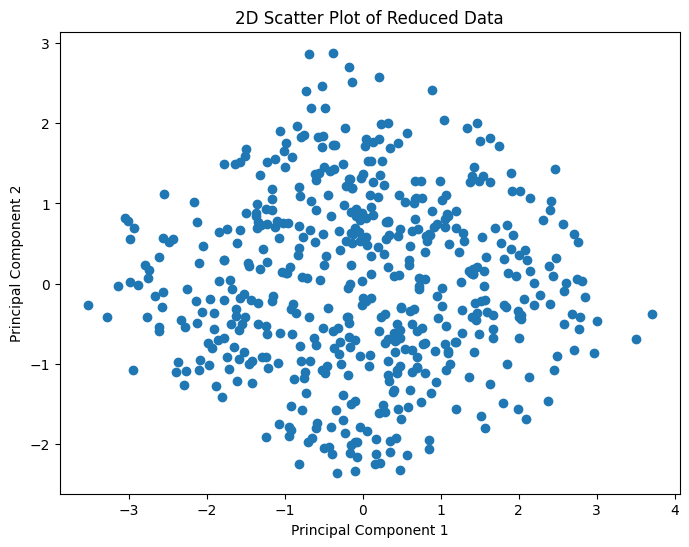

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'reduced_data' contains the data transformed by PCA
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# Scatter plot of the first two principal components
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D Scatter Plot of Reduced Data")

plt.show()

# **3. K-Means Clustering using numpy**

# **a. Cluster Initialization**

In [ ]:
import numpy as np

def initialize_centroids(data, k=3):

    # Get the number of data points (rows) in the dataset
    num_data_points = data.shape[0]

    # Randomly select k indices from 0 to num_data_points without replacement
    random_indices = np.random.choice(num_data_points, size=k, replace=False)

    # Select data points at the randomly chosen indices as centroids
    centroids = data[random_indices]

    return centroids

# Assuming 'reduced_data' is your dataset (from previous PCA step)
centroids = initialize_centroids(reduced_data, k=3)

print("Initialized Centroids:\n", centroids)

Initialized Centroids:
 [[-0.87455276 -1.1941211 ]
 [ 0.03470966  1.71465123]
 [-1.46175338  0.22071467]]


# **b. Cluster Assignment**

In [ ]:
import numpy as np

def initialize_centroids(data, k=3):
    """Randomly initializes k centroids from the dataset."""
    num_data_points = data.shape[0]
    random_indices = np.random.choice(num_data_points, size=k, replace=False)
    centroids = data[random_indices]
    return centroids

def assign_clusters(data, centroids):
    """Assigns each data point to the nearest centroid."""
    distances = np.sqrt(((data[:, np.newaxis, :] - centroids)**2).sum(axis=2))
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

# Assuming 'reduced_data' is your dataset and 'centroids' are initialized
cluster_assignments = assign_clusters(reduced_data, centroids)

print("Cluster Assignments:\n", cluster_assignments)

Cluster Assignments:
 [0 2 1 2 0 0 0 0 0 1 0 0 0 2 1 1 0 2 0 1 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 2 1 0 0 2 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 0 2 0 1 0 2 2 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 2 1 2 1 1 0 0 0 0 0 1 0 1 0 2 0 0 0 1 1
 0 0 2 1 1 1 0 0 1 2 0 0 0 0 0 0 0 1 0 2 0 2 2 1 1 0 0 1 0 0 0 0 2 2 0 0 0
 1 0 0 1 2 0 0 2 2 0 0 2 0 0 1 2 1 2 2 0 2 0 0 0 1 2 1 1 2 2 1 0 0 1 1 1 2
 1 1 0 2 0 0 1 0 1 0 0 1 2 0 0 0 0 1 1 0 0 1 0 1 0 2 0 2 2 0 2 1 2 1 2 1 0
 0 1 0 1 0 0 1 2 2 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 2 1 1 1 2 1 1
 1 2 0 1 0 1 1 0 0 1 0 1 1 1 1 0 2 2 1 2 2 0 0 1 1 2 1 1 1 1 2 0 2 2 1 0 2
 1 1 1 1 0 2 2 0 2 0 2 2 0 0 1 2 2 2 1 2 1 2 0 1 1 2 1 1 2 1 1 1 1 1 1 2 0
 2 1 2 2 0 1 1 1 1 0 0 1 1 1 1 2 1 2 1 1 1 2 0 1 1 0 2 1 1 2 2 2 1 2 2 1 2
 2 1 2 1 1 1 1 2 2 1 2 0 0 0 1 1 1 1 1 1 1 2 1 0 2 1 1 1 1 2 0 1 1 2 1 1 2
 1 1 1 0 2 2 1 1 1 2 1 1 2 1 1 1 2 2 0 1 1 2 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1
 1 

# **c. Centroid Update**

In [ ]:
import numpy as np

# ... (previous functions: initialize_centroids, assign_clusters) ...

def update_centroids(data, cluster_assignments, k):
    """Recalculates the centroids as the mean of the points in each cluster."""
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[cluster_assignments == i]
        new_centroids[i] = cluster_points.mean(axis=0)
    return new_centroids

# Assuming 'reduced_data' is your dataset, 'cluster_assignments' are from the previous step, and k=3
new_centroids = update_centroids(reduced_data, cluster_assignments, k=3)

print("Updated Centroids:\n", new_centroids)

Updated Centroids:
 [[ 0.07168318 -1.12431649]
 [ 0.8195471   0.85431143]
 [-1.63450683  0.24590303]]


# **d. Iteration and Convergence**

In [ ]:
import numpy as np

def initialize_centroids(data, k=3):
    """Randomly initializes k centroids from the dataset."""
    num_data_points = data.shape[0]
    random_indices = np.random.choice(num_data_points, size=k, replace=False)
    centroids = data[random_indices]
    return centroids

def assign_clusters(data, centroids):
    """Assigns each data point to the nearest centroid."""
    distances = np.sqrt(((data[:, np.newaxis, :] - centroids)**2).sum(axis=2))
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

def update_centroids(data, cluster_assignments, k):
    """Recalculates the centroids as the mean of the points in each cluster."""
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[cluster_assignments == i]
        new_centroids[i] = cluster_points.mean(axis=0)
    return new_centroids

def kmeans_numpy(data, k=3, max_iterations=100):
    """Performs K-Means clustering using NumPy."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        cluster_assignments = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, cluster_assignments, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return cluster_assignments, centroids

# Assuming 'reduced_data' is your dataset
cluster_assignments, final_centroids = kmeans_numpy(reduced_data, k=3)

print("Final Cluster Assignments:\n", cluster_assignments)
print("\nFinal Centroids:\n", final_centroids)

Final Cluster Assignments:
 [1 0 1 2 0 1 0 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 1 1 2 2 0 0 0 1 1 1 0 0 2 1 0
 1 1 0 0 1 2 1 1 0 1 2 1 1 0 1 1 1 0 1 0 1 1 2 2 1 2 1 0 0 0 0 0 1 0 1 0 0
 1 2 2 0 2 1 1 0 2 0 1 1 1 0 0 2 2 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 2 1
 0 1 2 0 0 2 1 2 1 2 0 1 1 0 0 2 0 2 2 0 2 2 1 1 0 0 0 1 1 1 1 2 1 1 0 1 2
 1 1 0 1 1 1 0 0 2 2 1 0 1 1 1 1 1 2 0 0 1 2 2 2 2 1 0 1 0 1 1 0 0 0 0 0 1
 2 1 0 2 0 0 0 0 2 1 0 0 0 1 2 0 2 2 0 1 2 0 0 1 2 2 2 2 0 2 2 1 0 2 1 1 2
 2 2 1 0 1 1 1 1 1 0 1 2 0 1 0 0 1 2 1 1 1 1 1 2 1 0 1 0 0 1 0 1 2 2 0 2 1
 1 1 0 2 0 0 2 0 0 1 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 2 2 1 2 0 2 2
 2 0 1 1 1 2 2 0 1 2 1 2 2 2 1 0 0 0 2 0 0 1 1 2 2 0 2 2 2 1 2 0 0 2 1 1 2
 2 1 2 2 1 0 2 0 2 1 0 0 1 0 2 0 0 0 2 0 1 0 0 2 1 0 1 1 2 1 2 2 2 2 2 0 0
 0 1 2 0 0 1 2 1 1 0 0 1 1 2 2 2 2 0 1 1 2 0 0 2 1 0 0 2 1 2 0 2 1 0 0 1 0
 0 2 0 2 2 1 2 0 2 2 2 0 0 1 1 2 1 2 1 2 2 2 1 0 0 2 2 2 2 0 0 2 1 0 2 2 0
 1 2 2 0 2 0 2 2 2 0 2 2 0 1 1 2 2 0 1 2 2 0 2 1 2 2 2 2 2 0 0 2 2 0 0 2

# **4. Cluster Analysis and Business Insights**

# **a. Cluster Quality Metrics**

In [ ]:
import numpy as np

# ... (previous functions: initialize_centroids, assign_clusters, update_centroids, kmeans_numpy) ...

def calculate_inertia(data, cluster_assignments, centroids):
    """Calculates the inertia (sum of squared distances of points to their nearest centroid)."""
    inertia = 0
    for i in range(centroids.shape[0]):  # Iterate through clusters
        cluster_points = data[cluster_assignments == i]
        inertia += ((cluster_points - centroids[i])**2).sum()  # Sum of squared distances for the cluster
    return inertia

# Assuming 'reduced_data', 'cluster_assignments', and 'final_centroids' are from the previous step
inertia = calculate_inertia(reduced_data, cluster_assignments, final_centroids)

print("Inertia:", inertia)

Inertia: 637.6657869870314


# **b. Interpretation**

**Interpretation:**

Since we don't have the original feature names and their descriptions for the reduced_data (which is the output of PCA), it's difficult to give precise characteristics in terms of original features like "high traffic branches" or "low deposit branches." However, we can still interpret the clusters in the context of the reduced dimensions (Principal Component 1 and Principal Component 2).

General Interpretation Based on Reduced Dimensions:

Cluster 1: Might represent data points that have high values for Principal Component 1 and low values for Principal Component 2. This could indicate a specific combination of original features that are important for this group.
Cluster 2: Might represent data points that have low values for Principal Component 1 and high values for Principal Component 2. This again suggests a different combination of original features that distinguish this group.
Cluster 3: Might represent data points that have moderate values for both Principal Component 1 and Principal Component 2, potentially indicating a more average or mixed profile compared to the other clusters.
To get more specific insights, you would need to:

Relate the principal components back to the original features: Analyze the PCA loadings to understand which original features contribute most to each principal component. This will help you translate the cluster characteristics in terms of the original features.
Visualize the clusters in the original feature space: Plot the data points in the original feature space and color them according to their cluster assignments. This can give you a visual understanding of how the clusters differ in terms of the original features.
Hypothetical Operational or Marketing Strategies (assuming we have original feature information):

High Traffic Branches:
Operational: Increase staffing, extend operating hours, optimize layout for efficient customer flow.
Marketing: Targeted promotions for high-demand products/services, loyalty programs to retain customers.
Low Deposit Branches:
Operational: Focus on cross-selling and upselling opportunities to increase deposit amounts, offer personalized financial advice.
Marketing: Campaigns to promote savings products, educational initiatives on financial planning.
Medium Area Branches:
Operational: Balance staffing and resources based on average traffic and deposit levels.
Marketing: A mix of strategies from the other two groups, focusing on customer retention and acquisition.
Dataset Description:

You haven't provided the description of the original dataset (bank.csv). Knowing the features and their meanings would be crucial to give more accurate and specific interpretations and strategies. Please provide the dataset description for a more detailed analysis.

I hope this general interpretation and the suggestions are helpful! Let me know if you have any other questions or if you can provide the dataset description.